<a href="https://colab.research.google.com/github/DinaTTomoum/Thesis2021/blob/main/trump16ngrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

# Import the libraries
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
# Import re is regular expressions
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
from nltk.corpus import stopwords
import spacy
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [4]:
# load in all the modules for ngram
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk import FreqDist


In [5]:
from google.colab import files
uploaded = files.upload()  


Saving Trump2016.csv to Trump2016.csv


In [7]:
import pandas as pd
data = pd.read_csv('Trump2016.csv', encoding= 'unicode_escape')

In [10]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.groupby([data['date'].dt.year.rename('year'), data['date'].dt.month.rename('month')]).agg({'count'})

handle Election  text  ... place_name place_country source_url
            count    count count  ...      count         count      count
year month                        ...                                    
2016 1        438      438   438  ...          5             5        438
     2        494      494   494  ...         23            23        494
     3        441      441   441  ...         20            20        441
     4        283      283   283  ...         24            24        283
     5        351      351   351  ...          8             8        351
     6        303      303   303  ...         17            17        303
     7        358      358   358  ...         29            29        358
     8        283      283   283  ...         42            42        283
     9        267      267   267  ...         36            36        267

[9 rows x 16 columns]

In [ ]:
data.head()

,handle,Election,text,is_retweet,original_author,date,time,in_reply_to_screen_name,is_quote_status,lang,retweet_count,favorite_count,place_full_name,place_name,place_country,source_url
0,realDonaldTrump,2016,Join me for a 3pm rally - tomorrow at the Mid-...,False,NaN,9/27/2016,22:13:24,NaN,False,en,2181,6172,NaN,NaN,NaN,http://twitter.com/download/iphone
1,realDonaldTrump,2016,"Once again, we will have a government of, by a...",False,NaN,9/27/2016,21:08:22,NaN,False,en,4132,11239,NaN,NaN,NaN,http://twitter.com/download/iphone
2,realDonaldTrump,2016,"On National #VoterRegistrationDay, make sure y...",True,GOP,9/27/2016,20:31:14,NaN,False,en,2953,6963,NaN,NaN,NaN,http://twitter.com/download/iphone
3,realDonaldTrump,2016,Hillary Clinton's Campaign Continues To Make F...,False,NaN,9/27/2016,20:14:33,NaN,False,en,3833,9840,NaN,NaN,NaN,http://twitter.com/download/iphone
4,realDonaldTrump,2016,"'CNBC, Time magazine online polls say Donald T...",False,NaN,9/27/2016,20:06:25,NaN,False,en,4236,10948,NaN,NaN,NaN,http://twitter.com/download/iphone


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'


def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet


# # cleaning master function
# def clean_tweet(tweet, bigrams=False):
#     tweet = remove_users(tweet)
#     tweet = remove_links(tweet)
#     tweet = tweet.lower() # lower case
#     tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
#     tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
#     tweet = re.sub(r'[^\x00-\x7F]+','', tweet)
#     tweet_token_list = [word for word in tweet.split(' ')
#                             if word not in my_stopwords] # remove stopwords

#     if bigrams:
#         tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
#                                             for i in range(len(tweet_token_list)-1)]
#     tweet = ' '.join(tweet_token_list)
#     return tweet


#create a function to clean the tweets
def cleanTxt(text) :
  text = remove_users(text)
  text = remove_links(text)
  text = text.lower() # lower case
  text = re.sub('['+my_punctuation + ']+', ' ', text) # strip punctuation
  text = re.sub('([0-9]+)', '', text) # remove numbers
  text = re.sub(r'[^\x00-\x7F]+','', text)

  text = re.sub('@[^A-Za-z0-9^,!.\/+-=]', '', text) #remove mentions
  text = re.sub(r'#', '', text) #remove the hashtag symbol
  text= re.sub(r'RT[\s]+', '', text) #removing RT (retweets) text 
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
  text = re.sub('ENDOFARTICLE.','', text) # get rid of the "ENDOFARTICLE." text
  tweet_token_list = [word for word in text.split(' ')
                            if word not in my_stopwords] # remove stopwords
  text = ' '.join(tweet_token_list)

  return text
df_cln= data.text.apply(cleanTxt)
cln = [' '.join(df_cln)]
listToStr = ' '.join(map(str, cln))   
#print(listToStr) # unhyphenate in case you want to see it



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_cln

0       join pm rally   tomorrow mid america center co...
1              government  people  join movement today   
2       national voterregistrationday  make sure regis...
3       hillary clinton campaign continues make false ...
4        cnbc  time magazine online polls say donald t...
                              ...                        
3213       facebook groups voting trump   people    gr...
3214       watched lowell mass speech  awesome  great ...
3215      iowa key endorsement  wait iowa caucus  week...
3216           minimizing dependency china crucial tru...
3217        donald get big business back make america ...
Name: text, Length: 3218, dtype: object

In [ ]:

import nltk
from nltk.util import ngrams
nltk.download('punkt')

# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
onegram = ("1-gram: ", extract_ngrams(listToStr, 1))
twogram = ("2-gram: ", extract_ngrams(listToStr, 2))
threegram = ("3-gram: ", extract_ngrams(listToStr, 3))
fourgram = ("4-gram: ", extract_ngrams(listToStr, 4))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
fourgram[1][1:4]

['pm rally tomorrow mid',
 'rally tomorrow mid america',
 'tomorrow mid america center']

In [ ]:
unigramFreq = collections.Counter(list(onegram[1]))
trigramFreq = collections.Counter(list(threegram[1]))
bigramFreq = collections.Counter(list(twogram[1]))
quadgramFreq = collections.Counter(list(fourgram[1]))
quadgramFreq.most_common(10)

[('make america safe great', 9),
 ('trump make america great', 8),
 ('make america safe amp', 7),
 ('america safe amp great', 7),
 ('make america great trump', 7),
 ('lightweight senator marco rubio', 7),
 ('interviewed tonight pm enjoy', 6),
 ('trump thank america trump', 6),
 ('great new poll thank', 5),
 ('goofy elizabeth warren sometimes', 5)]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords, 
            min_font_size = 10).generate(str(df_cln)) 


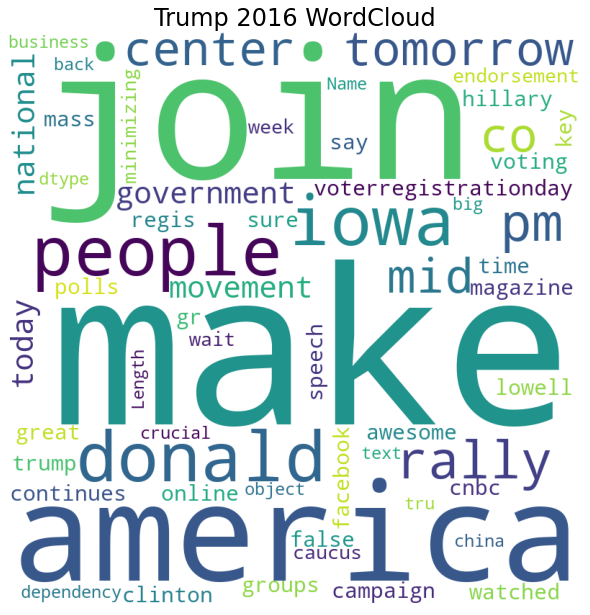

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title ("Trump 2016 WordCloud", size=24)
plt.show() 

In [ ]:
top30bi = bigramFreq.most_common(30)
top30quad = quadgramFreq.most_common(30)
top30uni = unigramFreq.most_common(30)
top30tri = trigramFreq.most_common(30)

In [ ]:
top30bi[1][1]

145

Text(0.5, 1.0, 'Trump 2016 - Top 30 4 Grams')

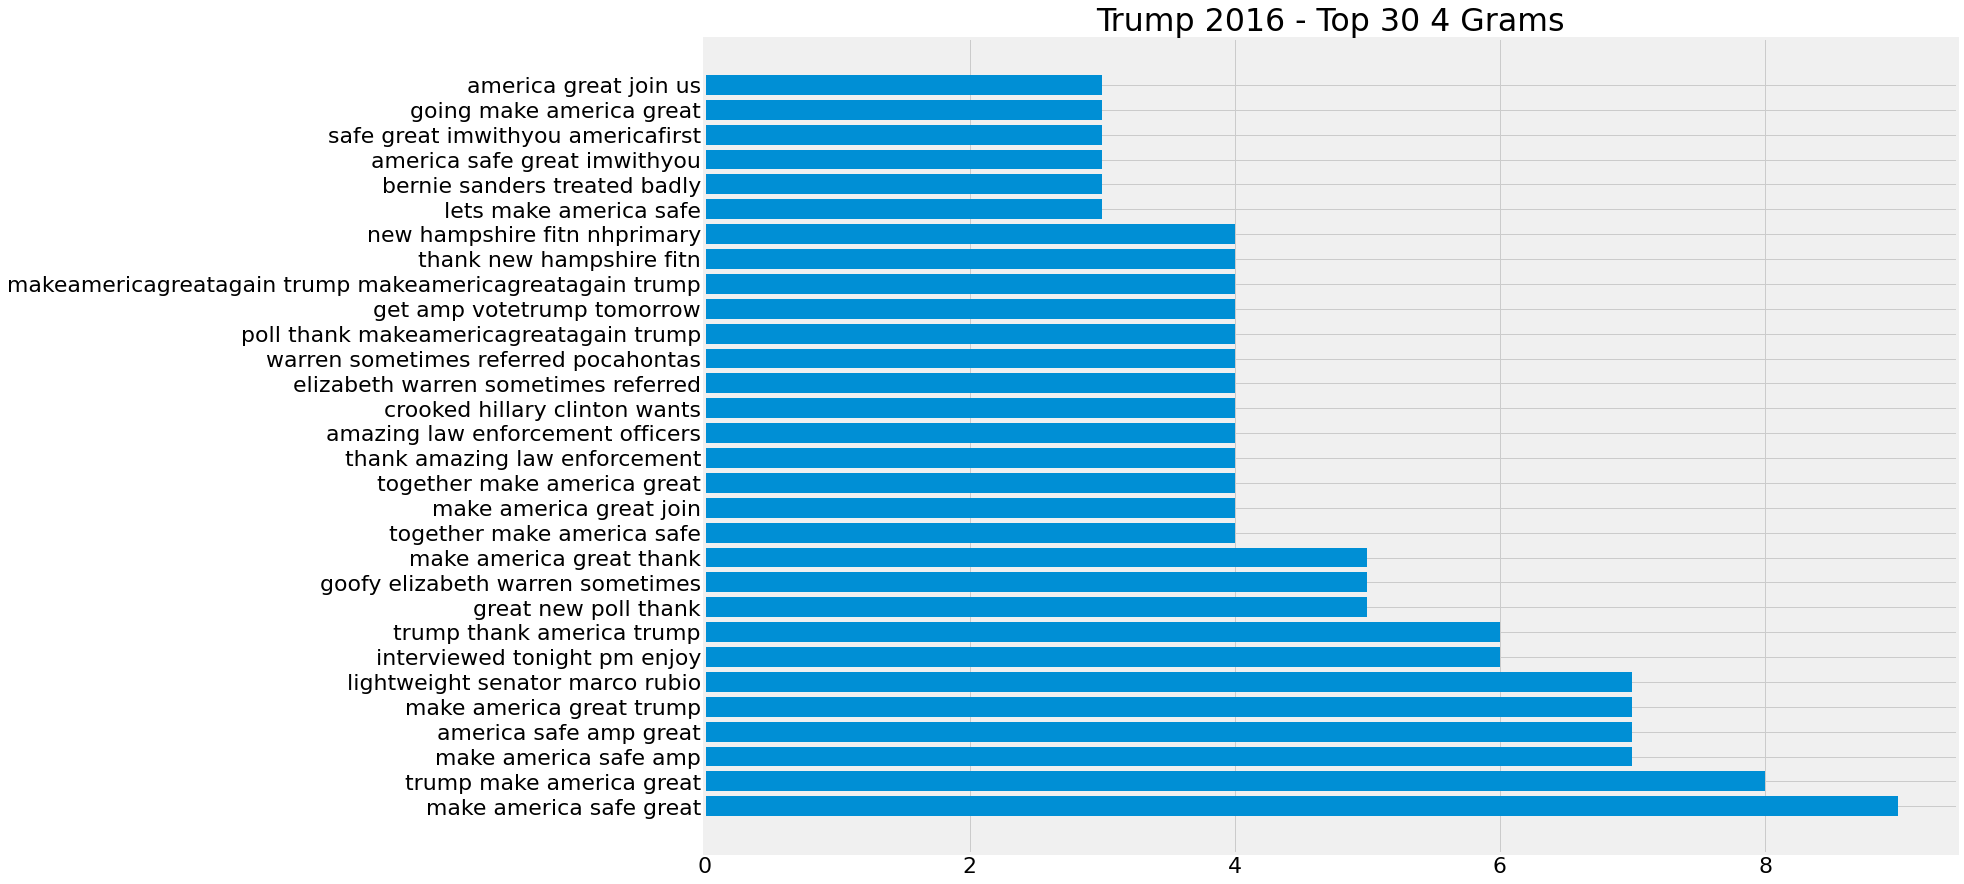

In [ ]:
import matplotlib.pyplot as plt
top30quad  = [list(elem) for elem in top30quad]
xs, ys = [*zip(*top30quad)]
plt.figure(figsize=(20,15), )
plt.rcParams.update({'font.size': 22})
plt.barh(xs,ys)
plt.title ("Trump 2016 - Top 30 4 Grams")